In [53]:
!pip install pandas ipython-sql sqlalchemy

In [101]:
import pandas as pd
import sqlite3
import prettytable
from prettytable import TableStyle

prettytable.DEFAULT = TableStyle.PLAIN_COLUMNS

In [59]:
%load_ext sql
%sql sqlite:///sales.db


The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [61]:
df = pd.read_csv("sales_data.csv")
conn = sqlite3.connect("sales.db")
df.to_sql("sales", conn, if_exists="replace", index=False)

48

In [87]:
df.columns

Index(['index', 'product_line', 'month', 'warehouse', 'net_revenue'], dtype='object')

In [122]:
%%sql
SELECT *,
  ROUND(100.0 * net_revenue / SUM(net_revenue) OVER (PARTITION BY month), 2) AS warehouse_share_pct
FROM (
  SELECT
    product_line,
    month,
    warehouse,
    ROUND(SUM(net_revenue), 2) AS net_revenue
  FROM Sales
  WHERE month IN ('June', 'July', 'August')
  GROUP BY product_line, month, warehouse
) AS monthly_data
ORDER BY product_line, month, net_revenue DESC;

 * sqlite:///sales.db
Done.


product_line,month,warehouse,net_revenue,warehouse_share_pct
Braking system,August,Central,3039.41,4.95
Braking system,August,West,2500.67,4.07
Braking system,August,North,1770.84,2.88
Braking system,July,Central,3778.65,7.7
Braking system,July,West,3060.93,6.24
Braking system,July,North,2594.44,5.29
Braking system,June,Central,3684.89,7.5
Braking system,June,North,1487.77,3.03
Braking system,June,West,1212.75,2.47
Electrical system,August,North,4721.12,7.68


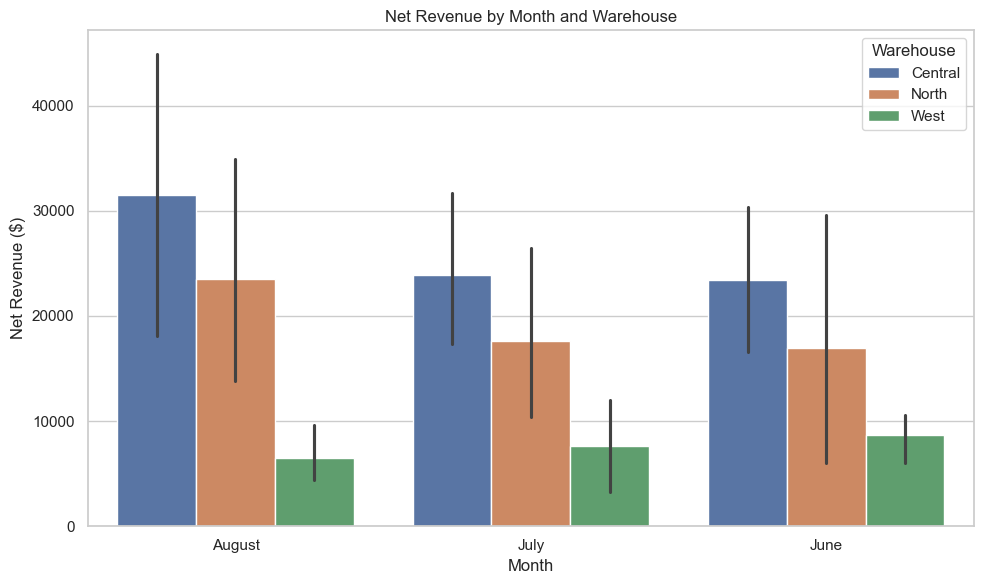

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Define the SQL query
query = """
SELECT
    product_line,
    month,
    warehouse,
    ROUND(SUM(net_revenue), 2) AS net_revenue
FROM
    Sales
WHERE
    month IN ('June', 'July', 'August')
GROUP BY
    product_line,
    month,
    warehouse
"""

# Executing the query and loading results into a DataFrame
df_summary = pd.read_sql_query(query, "sqlite:///sales.db")

# Plot: Net Revenue by Month and Warehouse
plt.figure(figsize=(10, 6))
sns.barplot(data=df_summary, x="month", y="net_revenue", hue="warehouse", estimator=sum)
plt.title("Net Revenue by Month and Warehouse")
plt.ylabel("Net Revenue ($)")
plt.xlabel("Month")
plt.legend(title="Warehouse")
plt.tight_layout()
plt.show()


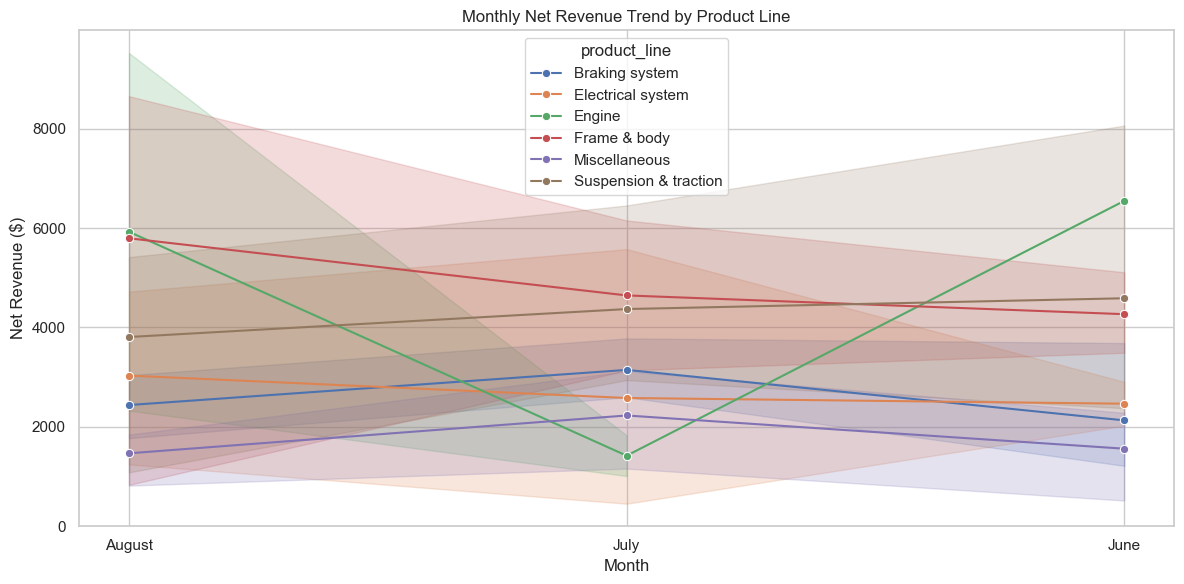

In [128]:
#Revenue Trends per Product Line
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_summary, x="month", y="net_revenue", hue="product_line", marker="o")
plt.title("Monthly Net Revenue Trend by Product Line")
plt.ylabel("Net Revenue ($)")
plt.xlabel("Month")
plt.tight_layout()
plt.show()

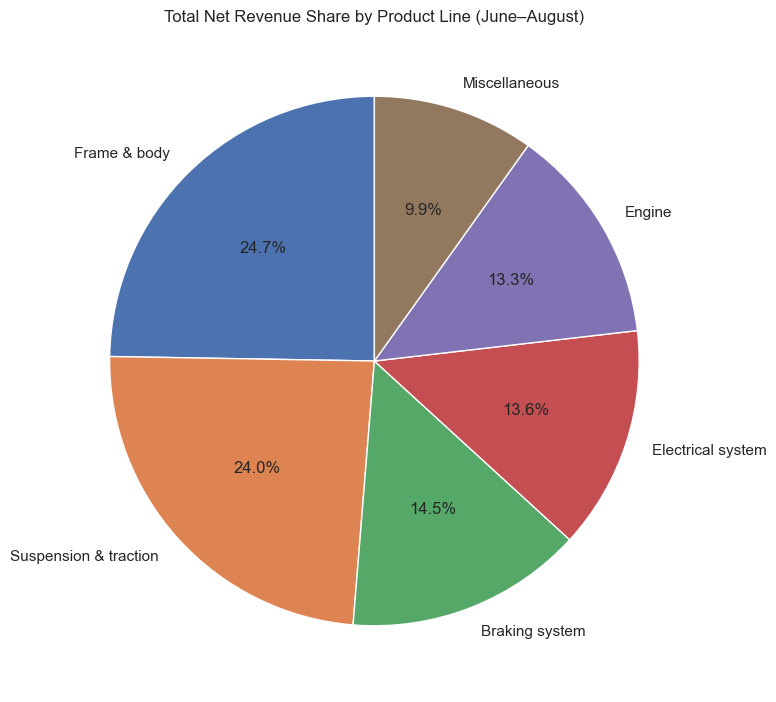

In [130]:
#Total Revenue Share by Product Line

# Aggregate total revenue by product_line
product_totals = df_summary.groupby("product_line")["net_revenue"].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 8))
plt.pie(product_totals, labels=product_totals.index, autopct="%1.1f%%", startangle=90)
plt.title("Total Net Revenue Share by Product Line (June–August)")
plt.tight_layout()
plt.show()